# Data analysis and visualisation of Cuebiq dataset

We studied data provided from Cuebiq https://www.cuebiq.com/resource-center/resources/cuebiq-spearheads-covid-19-data-collaborative/#utm_source=twitter&utm_medium=socialmedia&utm_campaign=blog-cuebiq-spearheads-covid-19-data-collaborative

We look at a set of measures that could be directly used for calibration of epidemic models on a 
nationwide scale. 
These measures are directly reflecting mobility and contact patterns in population.

- Cuebiq Mobility Index (CMI) - A measure of the median distance traveled by all devices.
e.g. A CMI of 2.5 for a county, would mean the median user in that county is traveling 250m.

- The Shelter-In-Place Analysis represents the percentage of users staying at home in any given county

All variables:
1. Reference date - Date
2. Week Name - Epoch week code  String/Varchar
3. County Name -Name of geographical region String/Varchar
4. State Name State name of county String/Varchar
5. County FIPS Code - The Federal Information Processing Standard code that uniquely identifies a county String/Varchar
6. CMI - Cuebiq Mobility Index - Float/Double
7. Sheltered in Place  - Percent of devices that sheltered in place, defined by a max distance of 100 meters - Float/Double
8. % less than 1 mile - Percent of devices that traveled 1 mile or less - Float/Double
9. % less than 10 miles - Percent of devices that traveled 10 miles or less - Float/Double


As it was mentioned in cuebiq, 
there is a clear 
threshold when plotting the distribution of #distance from home vs. #number of users:
it is evident that the distribution is bimodal, 
the first peak (about 10 meters) is that of people staying 
at home while the second is related to people who move - to work on other third places.



In [2]:

import pandas as pd
from matplotlib import pyplot as plt

file_path ="C:/Users/lyubo/Documents/DATA_networks/"
file ="covid19/cuebiqcmi-20200505_csv000/cuebiqcmi-20200505.csv"


data_mob = pd.read_csv(file_path + file)
print(data_mob.shape)
data_mob.head()

#url = "https://github.com/datasciencecampus/google-mobility-reports-data/blob/master/csvs/international_local_area_trends_UK_DE_FR_ES_IT_US_SE.csv"
#df = pd.read_csv(url, sep='\t', header=0, nrows=100000) #tdf = skmob.TrajDataFrame(df, latitude='latitude', longitude='longitude', datetime='check-in_time', user_id='user'))




(1533261, 9)


,ref_dt,week_name,county_name,state_name,county_fips_code,cmi,sheltered_in_place,less_1_mile,less_10_mile
0,2020-05-03,2020-W18,Pendleton,West Virginia,54071,1.779442,0.517857,0.080357,0.169643
1,2020-05-01,2020-W18,Pendleton,West Virginia,54071,4.086011,0.298246,0.064327,0.198830
2,2020-04-27,2020-W18,Pendleton,West Virginia,54071,3.680995,0.323864,0.090909,0.221591
3,2019-09-10,2019-W37,Pendleton,West Virginia,54071,4.037599,0.256684,0.096257,0.240642
4,2019-09-09,2019-W37,Pendleton,West Virginia,54071,4.028596,0.272251,0.094241,0.230366


In [5]:
import numpy as np


#function to get data from one country
def visualise_df_data(state_name, county_name, df):
    '''country name in str'''
    df_state = df[df['state_name']==state_name]
    df_state.head()
    print('shape of state', df_state.shape)
    
    # find unique values of Country 
    un_count = np.unique(df_state['county_name'].values)
    print('unique counties for state',un_count)
    
    
    return df_state


# get only df for country
df_virg = visualise_df_data('West Virginia', 'Pendleton', data_mob)
df_virg.head()

shape of state (26840, 9)
unique counties for state ['Barbour' 'Berkeley' 'Boone' 'Braxton' 'Brooke' 'Cabell' 'Calhoun' 'Clay'
 'Doddridge' 'Fayette' 'Gilmer' 'Grant' 'Greenbrier' 'Hampshire' 'Hancock'
 'Hardy' 'Harrison' 'Jackson' 'Jefferson' 'Kanawha' 'Lewis' 'Lincoln'
 'Logan' 'Marion' 'Marshall' 'Mason' 'McDowell' 'Mercer' 'Mineral' 'Mingo'
 'Monongalia' 'Monroe' 'Morgan' 'Nicholas' 'Ohio' 'Pendleton' 'Pleasants'
 'Pocahontas' 'Preston' 'Putnam' 'Raleigh' 'Randolph' 'Ritchie' 'Roane'
 'Summers' 'Taylor' 'Tucker' 'Tyler' 'Upshur' 'Wayne' 'Webster' 'Wetzel'
 'Wirt' 'Wood' 'Wyoming']
Barbour
Berkeley
Boone
Braxton
Brooke
Cabell
Calhoun
Clay
Doddridge
Fayette
Gilmer
Grant
Greenbrier
Hampshire
Hancock
Hardy
Harrison
Jackson
Jefferson
Kanawha
Lewis
Lincoln
Logan
Marion
Marshall
Mason
McDowell
Mercer
Mineral
Mingo
Monongalia
Monroe
Morgan
Nicholas
Ohio
Pendleton
Pleasants
Pocahontas
Preston
Putnam
Raleigh
Randolph
Ritchie
Roane
Summers
Taylor
Tucker
Tyler
Upshur
Wayne
Webster
Wetzel
Wirt


,ref_dt,week_name,county_name,state_name,county_fips_code,cmi,sheltered_in_place,less_1_mile,less_10_mile
0,2020-05-03,2020-W18,Pendleton,West Virginia,54071,1.779442,0.517857,0.080357,0.169643
1,2020-05-01,2020-W18,Pendleton,West Virginia,54071,4.086011,0.298246,0.064327,0.198830
2,2020-04-27,2020-W18,Pendleton,West Virginia,54071,3.680995,0.323864,0.090909,0.221591
3,2019-09-10,2019-W37,Pendleton,West Virginia,54071,4.037599,0.256684,0.096257,0.240642
4,2019-09-09,2019-W37,Pendleton,West Virginia,54071,4.028596,0.272251,0.094241,0.230366


# Plotting mobility indices

1. matplotlib 
2. plotly dashboard

No handles with labels found to put in legend.


Text(0.5, 1.0, 'mobility CMI for Virginia ')

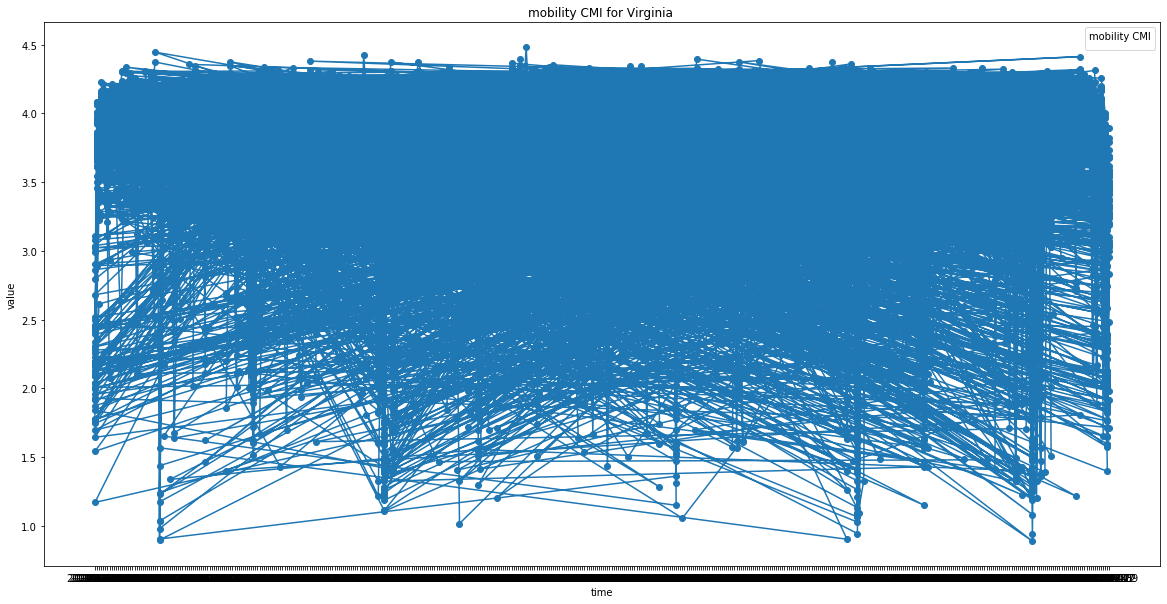

In [14]:
plt.figure(figsize=(20,10))
row = df_virg.ref_dt.values # dates

plt.plot(row, df_virg['cmi'].values, marker ='o')
plt.xlabel("time")
plt.ylabel("value")
plt.legend(title ='mobility CMI' )
plt.title("mobility CMI for Virginia ")


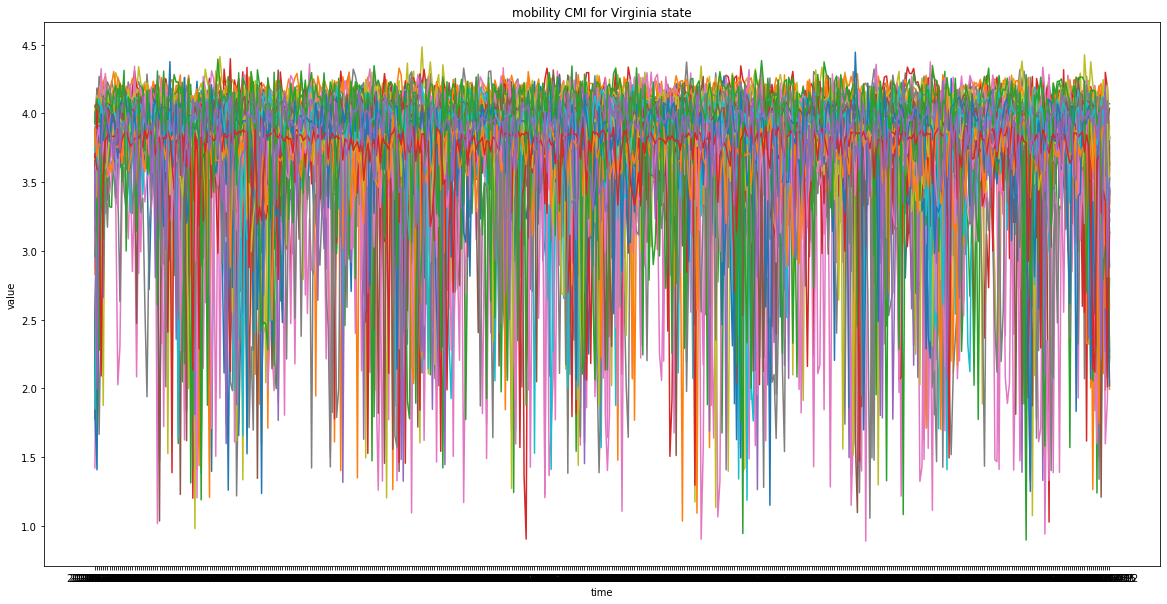

In [18]:
df_state = df_virg
un_count = np.unique(df_state['county_name'].values)
    
plt.figure(figsize=(20,10))

for ind in range(0, int(np.shape(un_count)[0])): # loop through all counties
#    print(un_count[ind])
    df_count = df_state[df_state['county_name'] ==un_count[ind]]
    
    
    #row = df_count.ref_dt.values # dates
    
    plt.plot(row, df_count['cmi'].values) #label = df_ile_de_fr['category'].iloc[ind]

    plt.xlabel("time")
    plt.ylabel("value")
#plt.legend(title ='mobility CMI' )
plt.title("mobility CMI for Virginia state")
plt.show()
